# UNIBE CAS ADS Module 3 - Data Analysis and Machine Learning

This document is a summary of Module 3, which presents and summarizes the different algorithms covered in class in a simple way, without delving into mathematical details. The goal is for non-specialists to be able to understand these examples and easily apply them to their own data.

Graduates will:
- **know** the **basic concepts** of machine learning: training,
testing, over/ and underfitting, performance measures;
- **can apply** software to perform linear regression, decision trees and random forest, neural networks (ML software is accessed via Python.)

Learning objectives:
- Machine learning overview, classification and regression
- Linear model and logistic regression
- Trees and forests
- PCA and embeddings
- Neural networks

# 1. Introduction
The machine learning process generally follows a structured, step-by-step approach, which can be broken down into three main phases:


1. Data Pre-processing:
  - Import the data
  - Clean the data
  - Encoding data
  - Split the data into training and test sets
  - Feature scaling
2. Modeling:
  - Build the machine learning model
  - Train the model on the training data
  - Make predictions using the model
3. Evaluation:
  - Calculate performance metrics to assess how well the model performs
  - Determine if the model is a good fit for the data and fulfills its intended purpose

This process is key to building effective machine learning models, and throughout the examples, you'll gain practical experience applying these steps.

# 2. Data pre-processing
In this chapter, we will explore in detail the **Pre-processing** process, which is common to all machine learning algorithms.
It is important to master this pre-processing step before exploring the different algorithms.

Data preprocessing is the crucial first step in any machine learning project because it transforms raw data into a clean, consistent format for the model:
- Data Quality: Raw data often contains errors like missing values or duplicates. Preprocessing cleans this up to ensure the model learns from accurate data, leading to better predictions.
- Consistency: Different formats across data sources can confuse the model. Preprocessing standardizes formats, ensuring consistent analysis.
- Performance: Preprocessing highlights important features and reduces noise, enabling the model to find patterns more effectively and make more accurate predictions.
- Efficiency: By simplifying data, preprocessing makes the model faster and more efficient, helping it focus on what matters most.

Preprocessing ensures your data is clean, organized, and ready for the model, improving both accuracy and efficiency.

## 2.1 Importing the libraries
The first step in building machine learning models is to import the necessary libraries. In this case, we’ll work with three essential libraries:




In [ ]:
# numpy helps us work with arrays, which are commonly used as input for machine learning models.
# It is typically imported with the shortcut np.
import numpy as np

# matplotlib creates charts and graphs.
# It is usually imported with the shortcut plt.
import matplotlib.pyplot as plt

# Pandas is used for data manipulation and preprocessing, such as importing datasets
# and creating matrices of features and dependent variables.
# It is commonly imported with the shortcut pd.
import pandas as pd

## 2.2 Importing the dataset
To begin data pre-processing in machine learning, the first step is to import a dataset. In this example, we are working with a CSV file, data.csv, which contains customer information for a retail company, including country, age, salary, and whether they purchased a product.

In [ ]:
# We use the read_csv function from Pandas to import the dataset, which is typically a CSV file
# In this case, the dataset is hosted on a server
# This reads the file and stores it as a data frame, which holds all rows and columns of data from the CSV.
dataset = pd.read_csv('https://static.grosjean.io/cas/module3/Data.csv')
dataset.head() # display the first few rows

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In any machine learning model, the dataset is split into two parts:
- **Features** (Independent Variables): The information used to make predictions, typically the columns other than the last one.
- **Dependent Variable**: The target outcome we want to predict, typically the last column in the dataset.

In [ ]:
# the features "X" include country, age, and salary
X = dataset.iloc[:, :-1].values # get all the rows and get all the column except the last one
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [ ]:
# the dependent variable "y" is whether the customer purchased the product or not
y = dataset.iloc[:, -1].values # get all the rows and get only the last column
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

## 2.3 Taking care of missing data
Missing data can cause errors when training machine learning models, so it’s important to handle it properly. There are two common approaches:

1. Ignoring or Deleting Missing Data:
This method works well when the amount of missing data is minimal (e.g., less than 1%). Deleting a small percentage of data may not significantly impact the model's performance.

2. Replacing Missing Data:
A more common and reliable approach is to replace missing values with a calculated statistic, such as the mean of the column. This ensures that no data is lost, especially when there are large amounts of missing values.

In [ ]:
# As we can see here, we have missing age for Spain and missing salary for Germany
# We want to replace this missing salary and age by the average
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [ ]:
# Import the library that handle missing data
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer specifying the replacement strategy.
# In this case we replace all missing values "missing_values=np.nan" with the mean "strategy='mean'"
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# The fit() method connects the imputer to the data by analyzing the columns with
# numerical values and calculating statistics like the mean or median.
# We give our last two columns that contains age and salary to the imputer
imputer.fit(X[:, 1:3])

# The transform() method applies the transformation to the data by replacing missing values
# with the calculated statistics. The result is an updated matrix of features with no missing values.
# Then we update the original matrix X, replacing the missing values in the specified columns with the mean values.
X[:, 1:3] = imputer.transform(X[:, 1:3])

# By using both the fit() and transform() methods, you ensure that your matrix of features
# is complete and ready for further processing, avoiding errors
# in your machine learning model caused by missing data.
# As we can see here, all the missing values were replaced by the mean of each column.
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

## 2.4 Encoding Categorical Data
In machine learning, we often need to convert categorical data (like country names) into numerical data so that models can process them. However, a simple numerical encoding (e.g., France = 0, Spain = 1, Germany = 2) can create unintended relationships between categories that don’t exist, as the model may incorrectly assume an order between these numbers.

To avoid this issue, we use **one-hot encoding**, which transforms a single categorical column into multiple binary columns. For example, the "country" column with values like "France," "Spain," and "Germany" is converted into three binary columns:

- France: **[1, 0, 0]**
- Spain: **[0, 1, 0]**
- Germany: **[0, 0, 1]**

This method removes any implied numerical order between categories.

Additionally, binary categorical data (such as "yes" or "no" values in the "purchased" column) can be safely encoded as 0 and 1 without negatively impacting the model.

In [ ]:
# To perform one-hot encoding in Python, we use the ColumnTransformer and OneHotEncoder
# These tools automate the conversion of categorical columns into binary columns,
# allowing machine learning models to interpret and process them correctly.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Step 1: Let's now encode the features "X"

"""
We start by creating an object of the ColumnTransformer class.
This object is responsible for applying transformations to specific columns.

In the transformers argument, we specify three things:
  - The type of transformation (e.g., "encoder" for one-hot encoding).
  - The transformer to apply (e.g., OneHotEncoder()).
  - The index of the column to transform (e.g., the "country" column, which has index 0).

We also set the remainder argument to "passthrough" to ensure that columns not being transformed (e.g., age and salary) are retained.
"""
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')


# the fit_transform() method is used
# to fit the ColumnTransformer to the data and apply the transformation in one step.
# The result is an updated matrix of features with one-hot encoded columns.
X = ct.fit_transform(X)

# Since machine learning models expect the feature matrix (X) as a NumPy array,
# we convert the result of fit_transform() to a NumPy array using np.array().
X = np.array(X)

# This process efficiently transforms categorical data into a suitable format
# for machine learning models while ensuring that the rest of the feature matrix remains intact.
# Let's check how our countries were transformed
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [ ]:
# Step 2: Let's now encode the dependant variable "y"

"""
for binary categorical data in the dependent variable (e.g., "yes" and "no"),
we use label encoding.
Label encoding converts these text values into binary numerical values:

  - "No"  becomes 0
  - "Yes" becomes 1
"""

# This transformation is done using the LabelEncoder class from scikit-learn.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# The fit_transform() method quickly converts the text into corresponding
# numerical values for the dependent variable vector, which is now ready for model training.
y = le.fit_transform(y)

# By label encoding for binary outcomes, you ensure that categorical data is
# in a format that machine learning models can process effectively.
# Let's check the result of the transformation
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

## 2.5 Splitting the dataset into Training set and Test set
When preparing data for machine learning models, there are two key steps: **splitting the dataset** into training and test sets, and applying **feature scaling**.

1. Splitting the Dataset, the dataset is split into two parts:
  - Training Set: Used to train the model on existing observations.
  - Test Set: Used to evaluate the performance of the model on new, unseen data, simulating future predictions.
2. Feature Scaling:
  - Feature scaling ensures that all features are on the same scale to prevent one feature from dominating others. This step adjusts the variables so that they take values within the same range, usually by normalizing or standardizing the data.

**Feature Scaling must be applied AFTER splitting the dataset**

The reason for this is to avoid **information leakage**. The test set is meant to represent new, unseen data. If you apply feature scaling before the split, you would be calculating the mean and standard deviation using the entire dataset, including the test set. This would allow the model to "see" the test data during training, which defeats the purpose of having a separate test set and leads to an inaccurate evaluation of model performance.

By applying feature scaling after the split, you ensure that the test set remains untouched during training, preserving its role as new data to validate the model’s true performance.

In [ ]:
# To split the dataset, we use the train_test_split function from scikit-learn’s model_selection module.
from sklearn.model_selection import train_test_split

"""
The function train_test_split splits the dataset into four sets:
  X_train: Matrix of features for the training set.
  X_test:  Matrix of features for the test set.
  y_train: Dependent variable for the training set.
  y_test:  Dependent variable for the test set.

The main parameters are:
  X: Matrix of features.
  y: Dependent variable vector.
  test_size: Specifies the proportion of data to allocate to the test set (e.g., 20% or 0.2).
  random_state: A fixed seed to ensure reproducibility of the split.

The function returns four sets: X_train, X_test, y_train, and y_test.
Typically, 80% of the data is assigned to the training set and 20% to the test set.
This ratio ensures the model has enough data to learn from while still reserving a portion for evaluation.
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train

array([[1.0, 0.0, 0.0, 35.0, 58000.0],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0]], dtype=object)

In [ ]:
X_test

array([[0.0, 1.0, 0.0, 50.0, 83000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0]], dtype=object)

In [ ]:
y_train

array([1, 0, 1, 0, 1, 1, 0, 0])

In [ ]:
y_test

array([0, 1])

## 2.6 Feature Scaling
**Feature scaling** is the process of putting all features on the same scale to prevent certain features from dominating others due to differences in their magnitudes. However, feature scaling is not necessary for all machine learning models but is crucial for models sensitive to the scale of data, such as gradient-based algorithms (e.g., logistic regression, support vector machines).

There are two Main Techniques:
- Standardization:
  - Formula: Subtract the mean of the feature and divide by the standard deviation.
  - Result: Values are typically scaled between -3 and +3.
  - Works well for all types of data, making it a reliable go-to method.
- Normalization:
  - Formula: Subtract the minimum value of the feature and divide by the range (maximum - minimum).
  - Result: Values are scaled between 0 and 1.
  - Best used when features follow a normal distribution.

Feature scaling should always be applied **after splitting** the dataset into training and test sets. This is to prevent information leakage from the test set into the training process. Feature scaling is fitted on the training data (X_train), and then the same scaling transformation is applied to the test data (X_test), using the mean and standard deviation calculated from X_train.

Practical Recommendation:
- Standardization is generally preferred because it works well across various scenarios and always improves model performance by ensuring consistent feature scaling.
- Normalization is ideal when you have normally distributed data.

Standardization should only be applied to numerical features, not to dummy (one-hot encoded) variables.
Dummy variables (e.g., binary 0s and 1s representing categorical data)
are already on the same scale, and applying scaling to them would distort the interpretation of these values.

Dummy variables already take values between 0 and 1, so scaling them is unnecessary
and could result in the loss of interpretability.
For instance, you may lose the ability to identify which binary values represent specific categories
(e.g., countries). Moreover, applying scaling to dummy variables
does not significantly improve model performance, and in most cases,
it can even make the interpretation harder.

Thus, feature scaling should be applied only to the numerical variables
(e.g., age, salary) where the scale differs significantly.
This ensures that your machine learning models are properly trained
without distorting categorical information.

In [ ]:
# To apply feature scaling, we use the StandardScaler class from the scikit-learn library,
# which standardizes the features by subtracting the mean and dividing by the standard deviation.
from sklearn.preprocessing import StandardScaler

# Initiate the scaler object
sc = StandardScaler()

"""
X_train[:, 3:] means that we take all the rows and only the age and salary columns

The first step is to fit the scaler on the training set (X_train) to compute
the mean and standard deviation for each numerical feature.
This process ensures that the scaling is based solely on the training data.
You only need to scale the numerical columns.

In this case, the numerical columns are the age and salary columns,
which have indexes 3 and 4, respectively.
We exclude the dummy (one hot encoded) variables from scaling.
"""
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])

"""
After applying feature scaling to the training set (X_train),
the next step is to apply the same transformation to the test set (X_test).
This is crucial to ensure that the test data is scaled using the same parameters
(mean and standard deviation) computed from the training set.

Since the test set simulates new, unseen data, you should only apply the transform()
method (not fit_transform()), using the scaler that was fitted on the training set.
This ensures consistency in scaling between the training and test sets,
and prevents the model from learning any information from the test data (avoiding information leakage).
"""
X_test[:, 3:] = sc.transform(X_test[:, 3:])

After applying the scaling to both X_train and X_test, you can print them to verify that the numerical columns (e.g., age and salary) are now scaled between a common range, typically between -3 and +3 or -2 and +2, while dummy variables remain unchanged.

In [ ]:
X_train

array([[1.0, 0.0, 0.0, -0.7529426005471072, -0.6260377781240918],
       [1.0, 0.0, 0.0, 1.008453807952985, 1.0130429500553495],
       [1.0, 0.0, 0.0, 1.7912966561752484, 1.8325833141450703],
       [0.0, 1.0, 0.0, -1.7314961608249362, -1.0943465576039322],
       [1.0, 0.0, 0.0, -0.3615211764359756, 0.42765697570554906],
       [0.0, 1.0, 0.0, 0.22561095973072184, 0.05040823668012247],
       [0.0, 0.0, 1.0, -0.16581046438040975, -0.27480619351421154],
       [0.0, 0.0, 1.0, -0.013591021670525094, -1.3285009473438525]],
      dtype=object)

In [ ]:
X_test

array([[0.0, 1.0, 0.0, 2.1827180802863797, 2.3008920936249107],
       [0.0, 0.0, 1.0, -2.3186282969916334, -1.7968097268236927]],
      dtype=object)

By properly scaling both the training and test sets, you ensure that your machine learning models are trained and evaluated under consistent conditions, leading to more accurate and reliable predictions.

# 3. Machine Learning Algorithms
In this chapter, we are going to cover all the machine learning algorithms we have seen during the module 3.

For each algorithm, we will start with some theory, followed by a simple example of training a model, and finally, the evaluation of its performance. The details of pre-processing are not covered in this chapter.

## 3.0 Supervised and Unsupervised learning
There are two types of machine learning algorithms:
- **Supervised learning** involves training a model using labeled data. This means the model receives input data along with the correct output (answers). For example, if you provide images of apples and bananas to the model, you also provide labels that say which image is an apple and which is a banana. The model learns from this data and can then make predictions on new, unseen images.
- **Unsupervised learning**, on the other hand, works with unlabeled data. Here, the model does not have any answers or labels to guide it. It must find patterns or relationships in the data on its own. One key technique in unsupervised learning is clustering.

**What is Clustering?**

Clustering is the process of grouping similar data points together. In unsupervised learning, where we don't provide the model with any labels, clustering helps the model identify and create groups based purely on the patterns in the data.

For instance, if we provide a dataset of customer information, such as their annual income and spending habits, but don’t specify any categories (e.g., high spenders vs. low spenders), the model will find natural clusters in the data. These clusters might represent different types of customers based on their income and spending behavior, even though we never explicitly told the model who belongs to which group.

**In conclusion**

- In supervised learning, the model is trained on data where the answers are known.
- In unsupervised learning, like clustering, the model explores patterns in unlabeled data, creating groups without knowing the "right" answers.
- Clustering is a powerful tool in unsupervised learning, allowing us to uncover hidden structures in data

## 3.1 Performance measures
### 3.1.1 MSE, MAE, R-squared

To measure the performance the performance of a **regression** algorithm, we would use the **MSE**, **MAE** AND **R-squared** metrics:

1. Mean Squared Error (MSE)
  - **MSE** gives you an idea of the average squared error in your predictions. Since it squares the errors, it makes large errors stand out more.
  - How to interpret ?
    - The lower the MSE, the better your model is at predicting the target variable.
    - Because MSE squares the errors, the units of MSE are squared as well, which makes it harder to interpret directly.
    - For example, if your target variable is salary , an MSE of 25'000$ means your average squared error is 25,000^2$. In real-world terms, you usually look for a smaller value because that means smaller errors.
  - In summary
    - Look for small values, but remember that it’s in squared units. Lower MSE means fewer large errors.
2. Mean Absolute Error (MAE)
  - **MAE** tells you the average error in your predictions, but in the same units as your target variable.
  - How to interpret ?
    - Let’s say your MAE is 1'000. This means, on average, your model's predictions are off by $1,000, either too high or too low.
    - Lower MAE values indicate better performance. If MAE is 0, your model is making perfect predictions.
    - MAE is easier to understand than MSE because it’s in the same units as your data. For example, if you’re predicting salaries, the MAE directly tells you how far off you are on average
  - In summary
    - This gives you an easy-to-understand average error in the same units as your target. The smaller, the better.
3. R-squared (R²)
  - **R-squared** tells you how well your model is explaining the variation in the data.
  - How to interpret ?
    - R² = 1: Your model is perfect; it explains all the variation in the data.
    - R² = 0: Your model doesn’t explain any of the variation; it’s no better than just guessing the average of the target variable.
    - Negative R²: This is rare but means your model is doing worse than just predicting the average.
    - Example: If R² is 0.85, it means 85% of the variability in the target variable is explained by your model, which is usually considered good.
  - In summary:
    - The closer to 1, the better. It tells you how much of the variation in the target variable your model explains.


**Practical Example**: Let’s say you’re predicting salaries based on years of experience:
- MSE: If you get an MSE of 50,000, it indicates the average squared difference between predicted and actual salaries is quite large. You may want to improve your model to reduce this.
- MAE: If your MAE is 1,500, it means, on average, your predictions are off by $1,500. This is a more intuitive way to see how well your model is doing.
- R²: If your R² is 0.9, this means your model explains 90% of the variation in salaries based on years of experience, which suggests it’s a good model.

### 3.1.2 Confusion matrix
A **confusion matrix** is a tool used to evaluate the performance of a **classification** model. It provides a detailed breakdown of how well a model's predictions match the actual outcomes by displaying the counts of true and false predictions for each class.

For a binary classification problem (where the possible outcomes are "Positive" and "Negative"), the confusion matrix is a 2x2 table:

|  | Predicted Positive | Predicted Negative |
| - | - | - |
| Actual Positive |	True Positive (TP) |	False Negative (FN) |
| Actual Negative |	False Positive (FP) |	True Negative (TN) |


Each cell contains the count of predictions falling into that category:

- True Positive (TP): The model predicted Positive, and the actual value is Positive.
- True Negative (TN): The model predicted Negative, and the actual value is Negative.
- False Positive (FP): The model predicted Positive, but the actual value is Negative (also called a "Type I Error").
- False Negative (FN): The model predicted Negative, but the actual value is Positive (also called a "Type II Error").

**Why Use a Confusion Matrix?**

A confusion matrix gives a more detailed breakdown of a model's performance beyond just its accuracy (the percentage of correct predictions).

It shows how well the model distinguishes between the different classes.
Whether the model is biased toward predicting one class over another.
Which types of errors the model is making (e.g., predicting more false positives or false negatives).

**How to Use a Confusion Matrix?**

After making predictions with a classification model, you can create a confusion matrix to compare the predicted results with the actual labels.

By inspecting the number of false positives and false negatives, you can understand where your model is going wrong and whether it is making specific types of errors more frequently.

The confusion matrix is a foundation for other performance metrics like accuracy, precision, recall, and F1-score.

**How to Interpret a Confusion Matrix?**

You can derive several important metrics from the confusion matrix:

1. **Accuracy**: The ratio of correctly predicted instances (both true positives and true negatives) to the total instances.

   
   $${Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$
   

2. **Precision**: The proportion of true positive predictions out of all positive predictions. This answers the question: "Of all the predicted 'Yes' instances, how many were actually 'Yes'?"

   $${Precision} = \frac{TP}{TP + FP}$$

   - High precision means few false positives.

3. **Recall (Sensitivity or True Positive Rate)**: The proportion of actual positive instances that were correctly identified. This answers the question: "Of all the actual 'Yes' instances, how many did the model correctly predict?"

   $${Recall} = \frac{TP}{TP + FN}$$

   - High recall means few false negatives.

4. **Specificity (True Negative Rate)**: The proportion of actual negative instances that were correctly identified. This is the opposite of recall, measuring how well the model identifies the "No" class.

   $${Specificity} = \frac{TN}{TN + FP}$$

5. **F1-Score**: The harmonic mean of precision and recall, giving a single metric that balances both. It is particularly useful when you want to account for both false positives and false negatives.

   $${F1score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$


**Example of Using a Confusion Matrix**

Let’s say you have a model that predicts whether people buy a product. After testing it on 100 people, you get the following confusion matrix:

| | Predicted: Buy |	Predicted: Not Buy |
| - | - | - |
| Actual: Buy |	40 (TP) |	10 (FN) |
| Actual: Not Buy |	5 (FP) |	45 (TN) |

From this confusion matrix:

- Accuracy = (40 + 45) / (40 + 45 + 5 + 10) = 85% (Overall, the model is correct 85% of the time).
- Precision = 40 / (40 + 5) = 88.89% (When the model predicts someone will buy, it is correct 88.89% of the time).
- Recall = 40 / (40 + 10) = 80% (The model correctly identifies 80% of actual buyers).
- Specificity = 45 / (45 + 5) = 90% (The model correctly identifies 90% of non-buyers).

**When to Use a Confusion Matrix?**

- Binary Classification: It’s widely used in binary classification problems where you want to evaluate the model’s ability to correctly identify two classes (like "Yes" vs. "No").
- Multi-Class Classification: You can extend the confusion matrix to multi-class classification, where each row and column will represent the number of instances of a specific class being classified as another class.
- Imbalanced Datasets: If your dataset has a class imbalance (e.g., 95% of data points are in one class), accuracy alone can be misleading. The confusion matrix helps focus on more specific metrics like precision and recall.


## 3.2 Simple Linear regressions
Linear regression is one of the simplest algorithms in machine learning, often used for predicting continuous values. The goal of linear regression is to draw the straightest line possible through those points to represent their general trend.

In essence, linear regression tries to adjust *m* and *b* so that the line fits the data points as closely as possible. Once you have that line, you can make predictions for new data.

Importing the necessary libraries:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Importing the dataset:

In [ ]:
# import the dataset, create the features and dependant variables
dataset = pd.read_csv("https://static.grosjean.io/cas/module3/Salary_Data.csv")
X = dataset.iloc[:, :-1].values # X = [YearsExperience]
y = dataset.iloc[:, -1].values # y = [Salary]

dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Train the model:

In [ ]:
# Split the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train the Linear Regression model on the training set
# the regressor contains our trained linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Use our newly created model to make some prediction:

In [ ]:
for age in range(1, 6):
  prediction = regressor.predict([[age]])[0]
  print(f"At {age} years of experience you are expected to earn {prediction:.2f}$")

At 1 years of experience you are expected to earn 34745.40$
At 2 years of experience you are expected to earn 44169.21$
At 3 years of experience you are expected to earn 53593.03$
At 4 years of experience you are expected to earn 63016.84$
At 5 years of experience you are expected to earn 72440.66$


Compute the performance metrics MSE, MAE and R-squared:

In [ ]:
# Predict the test set results
y_pred = regressor.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 49830096.85590839
Mean Absolute Error (MAE): 6286.453830757749
R-squared: 0.9024461774180497


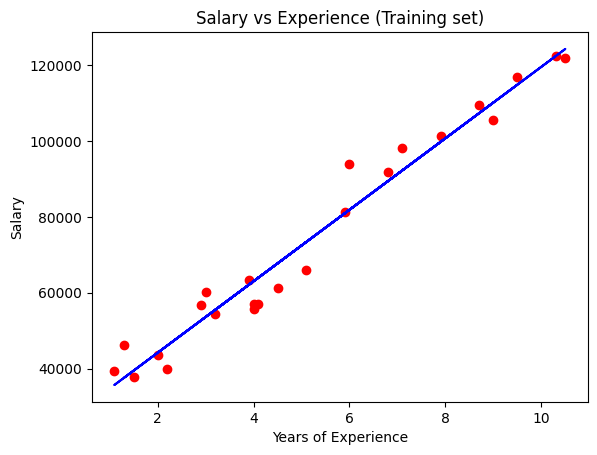

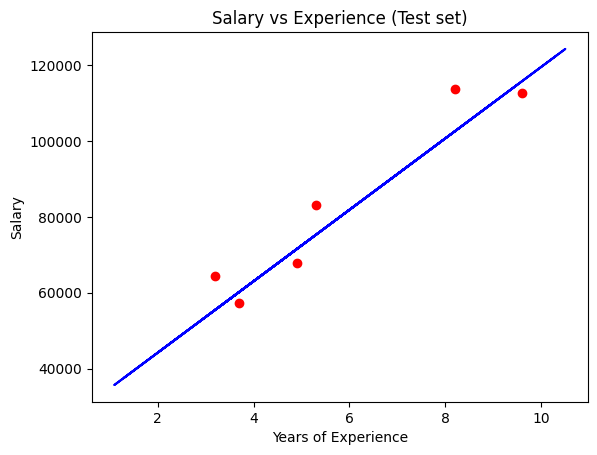

In [ ]:
# Plot the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Plot the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## 3.3 Logistic regression
**Logistic regression** is a statistical method used to predict a categorical outcome (like "yes" or "no") based on one or more independent variables. Unlike linear regression, which predicts a continuous outcome, logistic regression predicts probabilities that are then converted into binary outcomes (e.g., 0 for no, 1 for yes).

For example, an insurance company might want to predict whether a person will buy health insurance based on their age. The result is a probability (e.g., a 42% chance a 35-year-old will buy it). If the probability is greater than 50%, the model predicts "yes," otherwise it predicts "no."

The logistic regression model uses a sigmoid curve to map input variables (like age) to a probability between 0 and 1. You can also include multiple independent variables, like income or education, to make more complex predictions.


**Maximum likelihood estimation (MLE)** is a method used to find the best-fitting curve for a model, like logistic regression. The idea is to determine which curve is most likely to predict the actual data we have. Here's how it works:

For each data point, we calculate the probability that the model predicts the outcome (either yes or no). For example, the model might predict a 3% chance for one person to say yes to an offer, and for another, a 95% chance.

To find the best-fitting curve, we calculate the likelihood by multiplying these probabilities for all data points. For the "no" outcomes, we subtract the probability from 1 (e.g., 1% chance of yes means a 99% chance of no).

Then, we compare the likelihoods of different curves, adjusting the curve until we find the one that gives the highest likelihood—this is the curve that best fits our data.

In short, MLE helps us pick the curve that most accurately predicts the observed outcomes by maximizing the likelihood of the predictions being correct.

Importing the necessary packages:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap
from matplotlib.colors import ListedColormap

Importing the dataset:

In [3]:
dataset = pd.read_csv("https://static.grosjean.io/cas/module3/Social_Network_Ads.csv")

X = dataset.iloc[:, :-1].values # [Age, EstimatedSalary]
y = dataset.iloc[:, -1].values # [Purchased]

dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


Train the model:

In [4]:
# split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# train the classifier
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

Predict a new result:

In [5]:
# Based on the age and salary we want to know
# if a person will click an ad and buy the product
Age = 32
Salary = 120000

result = classifier.predict(sc.transform([[Age, Salary]]))[0]
result = "Yes" if result == 0 else "No"

print(f"Will a {Age} years old that has a salary of {Salary} buy the ad ? {result}")


Will a 32 years old that has a salary of 120000 buy the ad ? Yes


Compute the performance metrics:

In [11]:
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix:")
print(cm)
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")

Confusion matrix:
[[65  3]
 [ 8 24]]
Accuracy score: 0.89


Plot the Training set results:

<ipython-input-65-3277c112bab0>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


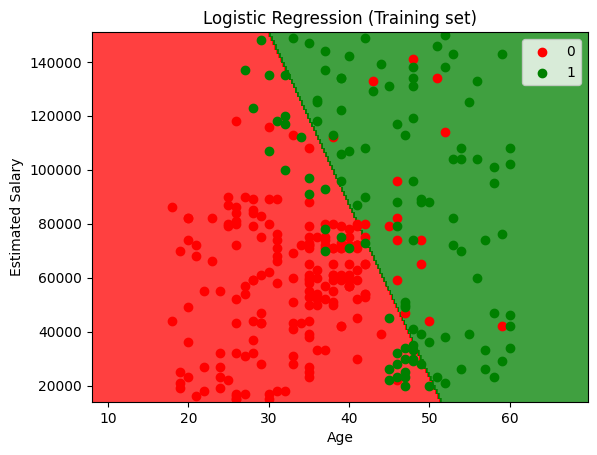

In [ ]:
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Plot the tests set:

<ipython-input-66-1c25207fd727>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


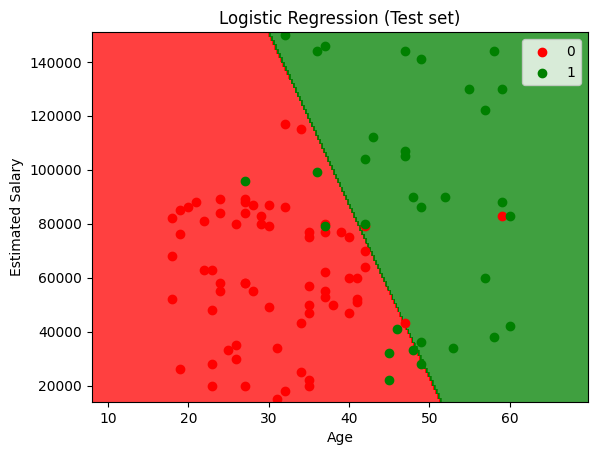

In [ ]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## 3.4 Decision Tree classification
A **decision tree** is a simple and intuitive machine learning algorithm that helps us make decisions based on conditions. It works by splitting data into smaller parts based on features, making it easier to classify or predict outcomes.

The tree starts with a root node that represents the entire dataset. It then makes decisions at each split by asking a question based on the data’s features, like “Is age greater than 30?” Each branch represents a possible answer (yes/no), leading to further splits until the data is fully categorized or predicted.

The final outcomes are represented by leaf nodes, which give the final prediction or classification.

**Key Concepts**
- **Splitting**: The process of dividing the data based on conditions.
- **Leaf Node**: The end point of a branch that gives the final classification or value.
- **Entropy and Gini Impurity**: These are metrics used to decide the best way to split the data. They help the algorithm determine which feature divides the data most effectively.

**Should I use decision tree ?**

Use decision trees when you need a simple, interpretable model for classification or regression, especially with non-linear relationships and small datasets. They're prone to overfitting but useful for understanding decision-making. Alternatives like **Random Forests** (for reducing overfitting) and **Gradient Boosting** (for better performance) build on decision trees for more complex tasks.

Import the libraries:

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


Import the dataset:

In [13]:
dataset = pd.read_csv('https://static.grosjean.io/cas/module3/Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values # [Age, Salary]
y = dataset.iloc[:, -1].values # [Purchased]

dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


Train the model:

In [ ]:
# Split the train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# features scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# train the classifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Predict a new result:

In [ ]:
# Based on the age and salary we want to know
# if a person will click an ad and buy the product
Age = 32
Salary = 120000

result = classifier.predict(sc.transform([[Age, Salary]]))
result = "Yes" if result == 0 else "No"

print(f"Does a {Age} years old that has a wage of {Salary} will buy the ad ? {result}")


Does a 32 years old that has a wage of 120000 will buy the ad ? No


Compute the performance:

In [15]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix:")
print(cm)
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")

Confusion matrix:
[[65  3]
 [ 8 24]]
Accuracy score: 0.89


Visualize the training set results:

<ipython-input-101-0b65fb2cbba5>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


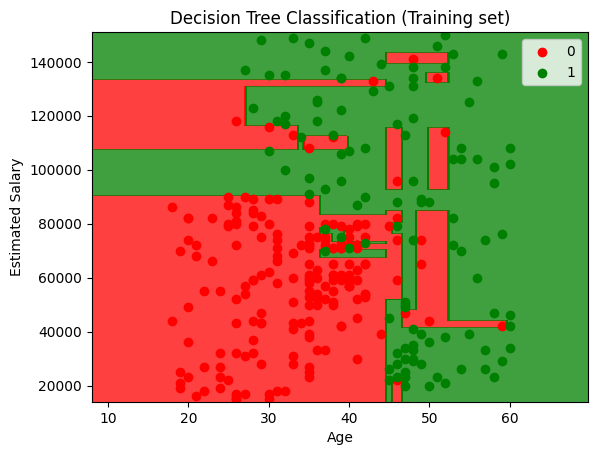

In [ ]:
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Visualize the Test set results:

<ipython-input-102-da7ce3ae1809>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


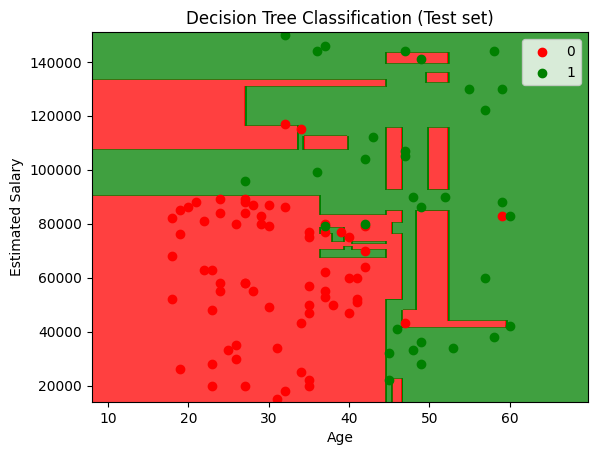

In [ ]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## 3.5 Random Forests classification

In random forests, we use **ensemble learning**, which combines multiple machine learning models to improve performance. Specifically, random forests use **multiple decision trees**. Instead of building one decision tree, we build several, each trained on a random subset of the data.

Here’s how it works:
- Select a random subset of data points from your training set.
- Build a decision tree using that subset.
- Repeat this process to create multiple trees.
- When making a prediction for new data, each tree gives its result, and the final prediction is based on the majority vote.

Import the necessary libraries:

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap


Import the dataset:

In [20]:
dataset = pd.read_csv('https://static.grosjean.io/cas/module3/Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values # [Age, Salary]
y = dataset.iloc[:, -1].values # [Purchased]

dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


Train the model:

In [21]:
# Split the train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# train the model
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

Predict a new result:

In [22]:
# Based on the age and salary we want to know
# if a person will click an ad and buy the product
Age = 32
Salary = 120000

result = classifier.predict(sc.transform([[Age, Salary]]))
result = "Yes" if result == 0 else "No"

print(f"Does a {Age} years old that has a wage of {Salary} will buy the ad ? {result}")


Does a 32 years old that has a wage of 120000 will buy the ad ? No


Predict the test set results:

In [23]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix:")
print(cm)
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")

Confusion matrix:
[[63  5]
 [ 4 28]]
Accuracy score: 0.91


Plot the training set results:

<ipython-input-24-c6d68e831793>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


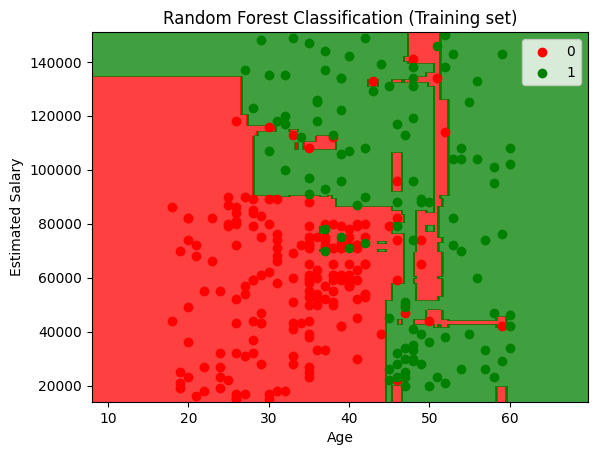

In [24]:
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Plot thetest set results:

<ipython-input-18-df61c20e9e94>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


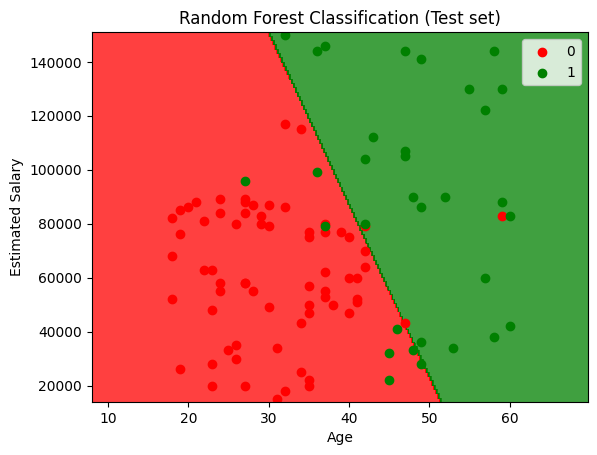

In [18]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## 3.6 PCA

**Principal Component Analysis (PCA)** is a widely used **unsupervised learning algorithm** primarily for dimensionality reduction. The goal of PCA is to simplify complex datasets by reducing the number of variables (or dimensions) while retaining most of the original information. Here's a simplified breakdown of how PCA works and its key points:

- **Purpose of PCA**: PCA is used to find correlations between variables in a dataset. If strong correlations exist, PCA helps reduce the dimensionality, which makes the data easier to work with and visualize, while retaining most of the key information. It's often used for tasks like visualization, feature extraction, noise filtering, and even in applications like stock market prediction or gene analysis.

- **How PCA Works**:
  - It identifies the directions of maximum variance in high-dimensional data.
  - Then, it projects the data onto a smaller subspace, preserving as much information as possible.
  - For example, if you have data with D dimensions, PCA reduces it to K dimensions (where K < D) by selecting the most informative features.

- **Steps in PCA**:
  - **Standardize** the data to ensure each feature contributes equally.
  - **Calculate** the eigenvectors and eigenvalues from the data’s covariance matrix.
  - **Sort the eigenvalues** in descending order, as the larger eigenvalues represent more variance.
  - **Construct a projection matrix** using the top K eigenvectors.
  - **Transform the data** using this projection matrix to reduce dimensions.

- **PCA Visualization**: PCA can be visualized in both 2D and 3D. In 3D visualizations, it becomes clearer how PCA transforms high-dimensional data into lower dimensions by projecting it along the axes that capture the most variance. Interactive tools can help users drag and view how PCA adjusts the data points.

- **PCA vs. Linear Regression**: PCA may seem similar to linear regression but serves a different purpose. While linear regression predicts values, PCA seeks to understand the relationship between variables by identifying principal axes in the data.

- **Limitations**: One key weakness of PCA is its sensitivity to outliers—outliers can distort the results, so it’s important to clean data before applying PCA.

In summary, PCA is a powerful tool for simplifying complex datasets, making it easier to visualize and analyze data while retaining key patterns.

Importing the libraries:

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap


Importing the dataset:

In [26]:
dataset = pd.read_csv('https://static.grosjean.io/cas/module3/Wine.csv')
X = dataset.iloc[:, :-1].values # [Alcohol, Malic_Acid,	Ash,	Ash_Alcanity,	Magnesium,	Total_Phenols,	Flavanoids,	Nonflavanoid_Phenols,	Proanthocyanins,	Color_Intensity,	Hue,	OD280,	Proline]
y = dataset.iloc[:, -1].values # [Customer_Segment]

dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


Here we're going to reduce the wine dataset with PCA and then train a logistic regression model with the data reduced by PCA:

In [32]:
# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Apply the PCA
# The n_components parameter controls how many dimensions (principal components) to retain.
# In this case, the data will be reduced to a 2-dimensional space, making it easier to visualize or train the model more efficiently.
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Train a logistic regression model with the data reduced
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

Predict the test set result:

In [33]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(f"Confusion matrix for this logistic regression:")
print(cm)
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")

Confusion matrix for this logistic regression:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
Accuracy score: 1.0


Visualise the training set results:

<ipython-input-23-c1bced4b6e8a>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


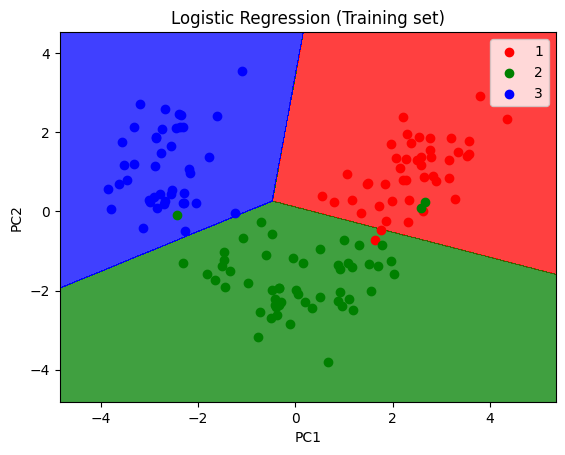

In [ ]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Visualise the test set results:

<ipython-input-24-97d2fc821a10>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


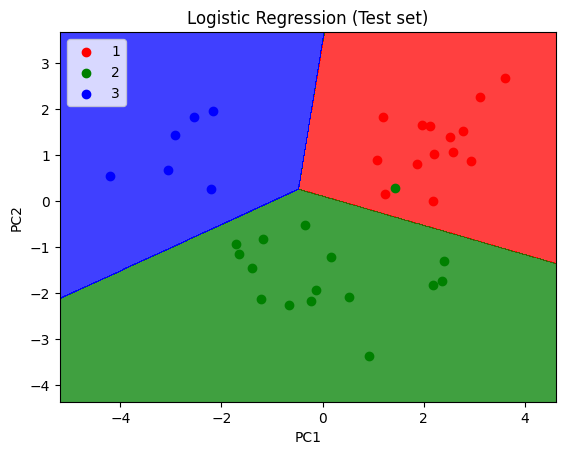

In [ ]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

##  3.7 K-means
In this section, we introduce K-Means Clustering, a popular and simple **unsupervised learning** algorithm. K-Means helps group unlabeled data into distinct clusters based on their similarities.

K-Means works through an iterative process to create K clusters of data points.
- **Decide the number of clusters (K)**: The first step is to choose how many clusters you want to create. The value of K (number of clusters) is something you can decide in advance.
- **Place the centroids**: After deciding K, the algorithm places K centroids randomly on the scatter plot. A centroid is simply a point that represents the center of a cluster. These centroids can be placed anywhere and do not have to overlap with existing data points.
- **Assign data points to the nearest centroid**: Next, the algorithm assigns each data point to the closest centroid. This step forms preliminary clusters. For example, an equidistant line can be drawn between the two centroids, and all data points on one side will belong to one cluster, while those on the other side will belong to the second cluster.
- **Recalculate the centroid positions**: For each cluster, the algorithm calculates the center of mass (or center of gravity). This is done by averaging the X and Y coordinates of all the data points in a cluster. The centroids are then moved to these new calculated positions, which represent the center of their assigned clusters.
- **Repeat the process**: Once the centroids have moved, the algorithm reassigns the data points to the nearest centroid based on the new positions. This process of recalculating the centroids and reassigning data points continues iteratively.
- **Stop when centroids no longer move**: The process repeats until the centroids no longer change position, meaning the clusters have stabilized. At this point, the algorithm has successfully created final clusters, and each data point belongs to the cluster closest to its final centroid.

**Why Use K-Means?**

K-Means is simple yet highly effective at identifying clusters within data. After the algorithm completes, you can then analyze the resulting clusters to interpret them in a business context. For instance, different clusters of customers may represent distinct spending behaviors or income levels, allowing you to tailor strategies accordingly.

This iterative approach makes K-Means a valuable tool for discovering patterns in unlabeled data, helping you understand the structure of your dataset without any prior labels or training.

**The elbow method**

The Elbow Method is a common technique for selecting the optimal number of clusters in K-Means Clustering.

When applying K-Means, one of the first decisions you need to make is how many clusters (K) to create. While sometimes domain knowledge might give you an idea of how many clusters to expect, if you're unsure, the Elbow Method can help.

The **Elbow Method** is a visual technique that helps you determine the optimal number of clusters by looking at the Within Cluster Sum of Squares (WCSS). **WCSS** measures the total squared distance between each point and its respective cluster centroid. The goal is to minimize this value as you increase the number of clusters.

Here’s the step-by-step process:
- **Run K-Means multiple times**: First, you need to run the K-Means algorithm for different numbers of clusters (e.g., 1, 2, 3, 4, etc.). For each K value, calculate the WCSS. The more clusters you have, the smaller the WCSS becomes because data points are grouped into more tightly fitting clusters.
- **Plot the WCSS vs. Number of Clusters**: After calculating the WCSS for each possible number of clusters, you plot the WCSS on the y-axis and the number of clusters on the x-axis. As you increase the number of clusters, WCSS decreases, but at some point, the rate of decrease slows down.
- **Identify the 'Elbow'**: The Elbow Method looks for the point where the WCSS stops decreasing rapidly and starts leveling off. This point forms a kink or "elbow" in the plot. The number of clusters corresponding to this elbow is considered the optimal number of clusters. It’s where adding more clusters doesn’t significantly improve the compactness of the data within clusters.

Key Points to Remember:
- **The Elbow Method is iterative**: You need to run K-Means several times with different K values before applying the method.
- **It’s a visual tool**: The decision is based on visually identifying the elbow in the plot.
- **Judgment call**: Sometimes the elbow may not be obvious, and it might be a judgment call as to which K is optimal.


Import the libraries:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

Import the dataset:

In [2]:
dataset = pd.read_csv('https://static.grosjean.io/cas/module3/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values # [Annual Income (k$),	Spending Score (1-100)]

dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Using the elbow method to find the optimal number of clusters:

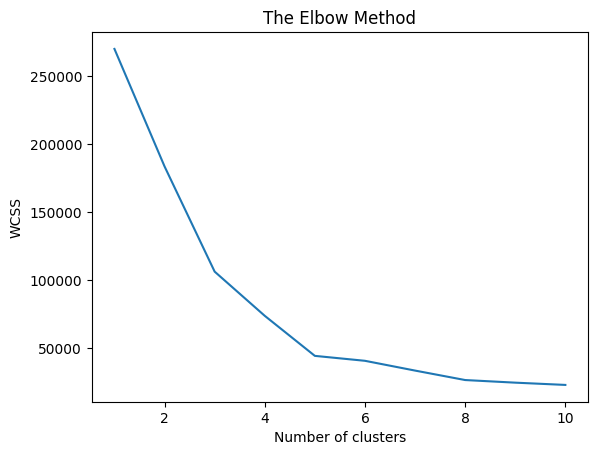

In [5]:
# K-Means++ initialization for the elbow method:
# Instead of randomly placing centroids, K-Means++ selects them strategically:
# 1. The first centroid is chosen randomly from the data points.
# 2. For each remaining centroid, the algorithm selects a point farthest from the existing centroids.
#    This spreads out the centroids across the dataset.
# 3. After initializing the centroids, K-Means proceeds with clustering as usual.
# K-Means++ improves the clustering efficiency and helps get better results when using techniques
# like the Elbow Method to find the optimal number of clusters.
wcss = []
for i in range(1, 11): # we'll do it for 10 clusters to find the optimal number of clusters
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The optimal number of clusters is **5**. We can see visualy here that 5 is where the descent of the wcss value starts to slowing down or reducing its descent..

Train the model with the right number of clusters:

In [6]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

Let's take a look at the `y_kmeans` variable.

The `y_kmeans` variable contains the classification in a cluster of the customer.

For instance, the customer 1 is in cluster 4, the customer 2 is in cluster 2 and customer 3 is in cluster 4

In [13]:
print(dataset.head())
y_kmeans

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

Visualize the clusters:

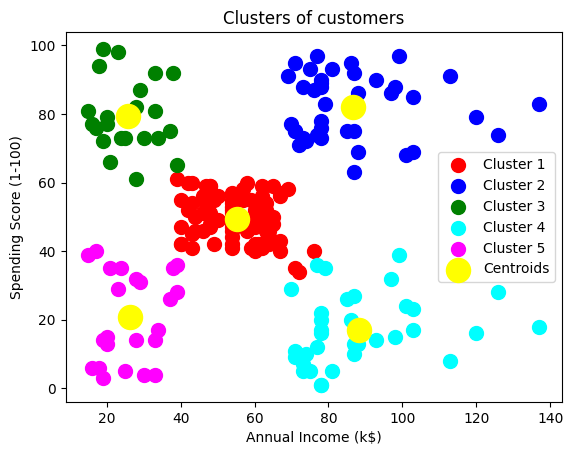

In [7]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Interpret the Clusters:
- Cluster 1: Low income, high spending.
- Cluster 2: High income, high spending (potential top customers).
- Cluster 3: Low income, low spending.
- Cluster 4: High income, low spending (customers to target with better offers).
- Cluster 5: Average income and average spending.

## 3.8 Hierarchical clustering
**Hierarchical Clustering** is another important technique in unsupervised learning. Hierarchical clustering is similar to K-Means but follows a different approach to grouping data points.

There are two main types of hierarchical clustering:
- Agglomerative (bottom-up): Starts with each data point as its own cluster and merges them step by step until only one cluster remains.
- Divisive (top-down): Starts with all data points in one cluster and splits them into smaller clusters. In this course, we focus on the agglomerative approach.

Agglomerative Hierarchical Clustering step by step:
- Step 1: Start with each data point as a separate cluster.
- Step 2: Find the two closest clusters and merge them into one. The result is fewer clusters.
- Step 3: Repeat this process, merging the closest clusters, until only one cluster remains.

The key here is how we define "closeness" between clusters, which can be measured in different ways:
- Minimum distance (closest points between clusters).
- Maximum distance (farthest points).
- Average distance (average of all distances between points in the clusters).
- Centroid distance (distance between cluster centroids).

We'll use Euclidean distance, the straight-line distance between two points. It is calculated using basic geometry: the square root of the sum of squared differences between corresponding coordinates.

The purpose of Hierarchical Clustering is to build a memory of how clusters were merged at each step. This memory is stored in a structure called a dendrogram, which visually represents the hierarchy of clusters. We'll discuss dendrograms as they help us understand the structure and relationships between clusters.

While hierarchical clustering initially combines all data points into one large cluster, the true purpose is to break this large cluster down into meaningful smaller clusters. But how do we decide the right number of clusters? This is where dendrograms come in. Dendrograms help visualize the clustering process step-by-step, showing how data points or clusters are merged based on their proximity.

Building a Dendrogram Step-by-Step:
- **Start with Individual Clusters**: Each data point starts as its own cluster. In the dendrogram, this is represented by each point being at the bottom.
- **Merge Closest Points**: The next step is to merge the two closest points (or clusters) based on their Euclidean distance. This is shown by connecting these points with a horizontal line on the dendrogram. The height of the line corresponds to the distance between the points, representing their dissimilarity.
- **Repeat the Process**: Continue merging the next two closest clusters and repeat until all points are combined into one large cluster. The vertical axis of the dendrogram reflects the distances between merged points or clusters at each step.

The **height** of the lines in the dendrogram indicates the **dissimilarity** between points or clusters. The further apart two points or clusters are, the higher the line connecting them will be. This helps to visualize how similar or different data points are.

Once the dendrogram is built, we can cut it at a specific height to determine the optimal number of clusters. This cut reveals the most appropriate number of clusters by examining where the largest jumps in distance occur.

Dendrograms are a powerful tool in hierarchical clustering, providing a visual summary of the merging process and helping determine how to segment data into meaningful clusters.

**How to Use a Dendrogram?**
To extract meaningful clusters from a dendrogram, follow these steps:
- **Set a Threshold**: Choose a dissimilarity threshold by drawing a horizontal line across the dendrogram. This line represents the maximum allowable dissimilarity within clusters. Any clusters formed above this threshold will not be combined.
- **Count** the Vertical Lines Crossed: The number of vertical lines the threshold crosses determines how many clusters you will have. Each line represents a cluster, and the points below that line belong to the same cluster.

**Example**
- Set a threshold at a certain height (e.g., 1.7). If the horizontal line crosses two vertical lines, you will have two clusters.
- Lowering the threshold may create more clusters, while raising it will combine clusters into fewer groups.

**How to find the optimal number of cluster?**

One common approach is to find the longest vertical line in the dendrogram that does not cross any extended horizontal lines. This long vertical line represents the largest dissimilarity between clusters, and cutting the dendrogram at this height often provides the optimal number of clusters.
- If the longest vertical line is crossed by a horizontal threshold, and it intersects three vertical lines, this indicates three clusters.

By analyzing the dendrogram and using the largest vertical distance to set your threshold, you can effectively determine the optimal number of clusters for your data. This technique provides an intuitive and visual way to extract meaningful insights from hierarchical clustering.


Import the libraries:

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

Import the dataset:

In [23]:
dataset = pd.read_csv('https://static.grosjean.io/cas/module3/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values # [Annual Income (k$),	Spending Score (1-100)]

dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Using the dendrogram to find the optimal number of clusters:

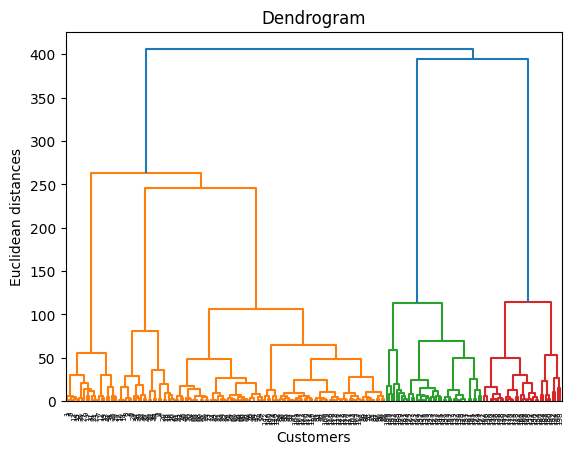

In [24]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

We chose **5** clusters based on the largest vertical distance in the dendrogram, which indicated a clear separation at that point. Although both 3 and 5 clusters were possible, the vertical distance for 5 clusters was slightly larger, suggesting a more distinct grouping. This decision was further supported by prior results from the K-Means algorithm and the Elbow Method, both of which also pointed to 5 as the optimal number of clusters. By combining these insights and measuring the pixel distances between the horizontal bars in the dendrogram, we confidently selected 5 clusters for the analysis.

Step-by-Step Process to find the optimal number of clusters:
- **Start from the Top**: Begin by examining the horizontal bars in the dendrogram. These bars represent the merging of clusters. Move downwards to observe where clusters are combined, and note the vertical distances between the horizontal bars. These distances represent the dissimilarity between the merged clusters.
- **Identify the Largest Vertical Move**: As you move down, focus on the largest vertical distance between two horizontal bars. This typically indicates a significant difference between clusters. The number of vertical bars (clusters) within this largest vertical move can guide you to the optimal number of clusters.
  - For example, if the largest vertical move contains three vertical bars, then three clusters might be optimal.
  - However, as you continue analyzing, if a larger vertical move appears later, it could suggest a different number of clusters.
- **Compare Cluster Options**: In some cases, there might be multiple valid cluster numbers. For example, in this case, both three clusters and five clusters make sense. While the dendrogram suggests that three clusters is a good option, you may already know from other methods, like K-Means or the Elbow Method, that five clusters is optimal.
- **Measure Precision**: If needed, you can even measure the pixel distances in the dendrogram to confirm which vertical distance is larger. This can help you decide between close options like three or five clusters.

Sometimes, there can be more than one reasonable number of clusters. Using multiple methods like K-Means and hierarchical clustering together provides extra insights, allowing you to make more informed decisions. In this example, both three and five clusters are viable, but based on previous analysis, we settle on five clusters as the optimal choice.

Train the model with the right number of clusters:

In [27]:
hc = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
y_hc = hc.fit_predict(X)

Visualise the clusters:

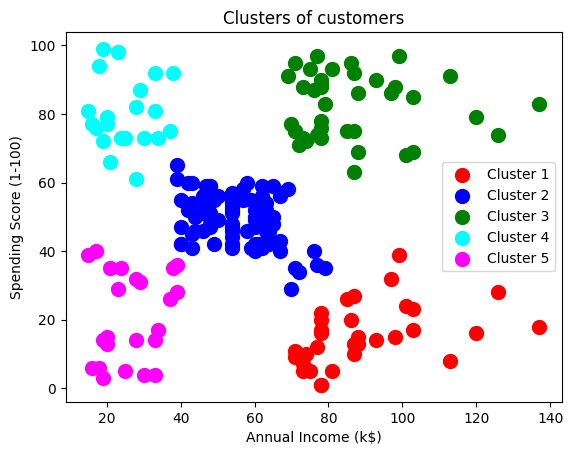

In [28]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## 3.9 XG-Boost
**XGBoost** is a powerful machine learning model that can be used for both regression and classification tasks. XGBoost is known for its efficiency and performance, often yielding excellent results across various problems.

Import the libraries:

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

Import the dataset:

In [46]:
dataset = pd.read_csv('https://static.grosjean.io/cas/module3/XGBoostData.csv')
X = dataset.iloc[:, :-1].values # [Sample, code, number,	Clump, Thickness,	Uniformity of Cell Size,	Uniformity of Cell Shape,	Marginal Adhesion,	Single Epithelial Cell Size,	Bare Nuclei,	Bland Chromatin,	Normal Nucleoli,	Mitoses]
y = dataset.iloc[:, -1].values # [Class]
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [44]:
X

array([[1000025,       5,       1, ...,       3,       1,       1],
       [1002945,       5,       4, ...,       3,       2,       1],
       [1015425,       3,       1, ...,       3,       1,       1],
       ...,
       [ 888820,       5,      10, ...,       8,      10,       2],
       [ 897471,       4,       8, ...,      10,       6,       1],
       [ 897471,       4,       8, ...,      10,       4,       1]])

In [45]:
y

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4,

Encode the dependant variable:

In [49]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,

Train the model:

In [50]:
# Split the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train the classifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Making the confusion matrix:


In [54]:
print(f"Confusion matrix:")
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")

Confusion matrix:
[[78  1]
 [ 4 54]]
Accuracy score: 0.9635036496350365


Dang soo good !!!

## 3.10 Artificial Neural Network

I won't cover this chapter in details. Sorry :(

Import the libraries:

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score


Check tensorflow version:

In [ ]:
tf.__version__

'2.17.0'

Import the dataset:

In [ ]:
dataset = pd.read_csv('https://static.grosjean.io/cas/module3/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values # [CreditScore,	Geography,	Gender,	Age,	Tenure,	Balance,	NumOfProducts,	HasCrCard,	IsActiveMember,	EstimatedSalary]
y = dataset.iloc[:, -1].values   # [Exited]

dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
y

array([1, 0, 1, ..., 1, 1, 0])

Label Encoding the "Gender" column:. Encoding categorical data:

In [ ]:
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [ ]:
X

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

One Hot Encoding the Geography column:

In [ ]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

Train the model:

In [ ]:
# Split the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialize the ANN
ann = tf.keras.models.Sequential()

# Adding the first input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Traning the ANN on the training set
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3752 - loss: 0.8420
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7821 - loss: 0.5299
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7958 - loss: 0.4660
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7972 - loss: 0.4469
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8055 - loss: 0.4271
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8091 - loss: 0.4269
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7990 - loss: 0.4395
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8026 - loss: 0.4205
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8223 - loss: 0.4107
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8317 - loss: 0.3963
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8241 - loss: 0.4168
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

Predicting the result of a single observation.

Use our ANN model to predict if the customer with the following informations will leave the bank:

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: $ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: $ 50000

So, should we say goodbye to that customer ?

In [ ]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
[[False]]


Therefore, our ANN model predicts that this customer stays in the bank!

Important note 1: Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

Important note 2: Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

Predicting the test set results:

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


Making the confusion matrix:

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1512   83]
 [ 196  209]]


0.8605